In [27]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, precision_recall_fscore_support 
from sklearn.preprocessing import MinMaxScaler
import torch 
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

In [28]:
path = '../corpus/breast-cancer-wisconsin.data'
with open(path, 'r') as f:
    lines = f.readlines()
# lines = lines[:2]
lines=[l.strip().replace('?','5').split(',') for l in lines]
lines = np.array(lines)
ids = lines[:,0].astype(np.int)
x = lines[:,1:-1].astype(np.float)

y = lines[:,-1].astype(np.int)
y = y/2-1

In [29]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

In [30]:
epoch = 12000
h = 100
lr = 0.01

In [31]:
model = nn.Sequential(
    nn.Linear(9,h),
    nn.Sigmoid(),
    nn.Linear(h,h),
    nn.Sigmoid(),
    nn.Linear(h,2)
)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)  
weight = torch.FloatTensor(np.array([1,2]))
criterion = nn.CrossEntropyLoss(weight=weight)

In [32]:
features = Variable(torch.from_numpy(x).type(torch.FloatTensor))
target = Variable(torch.from_numpy(y))
log =[]
for e in range(epoch):
    y_hat = model(features)
    loss = criterion(y_hat, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if e % 200 == 0:
        _, y_pred = torch.max(y_hat, 1)
        y_pred = y_pred.data.numpy()
        
        acc = accuracy_score(y, y_pred)
        p,r,f,_ = precision_recall_fscore_support(y, y_pred)
        #cm = confusion_matrix(y, y_pred)
        log.append((e, loss.data[0], f[0],f[1]))
    if e % 1000 == 0:
        print('Epoch %d: %f'%(e, loss))
print('DONE')

/Users/vietld/.miniconda3/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Epoch 0: 0.809206
Epoch 1000: 0.668053
Epoch 2000: 0.597851
Epoch 3000: 0.397333
Epoch 4000: 0.199231
Epoch 5000: 0.131401
Epoch 6000: 0.109134
Epoch 7000: 0.099923
Epoch 8000: 0.095328
Epoch 9000: 0.092682
Epoch 10000: 0.090973
Epoch 11000: 0.089761
DONE


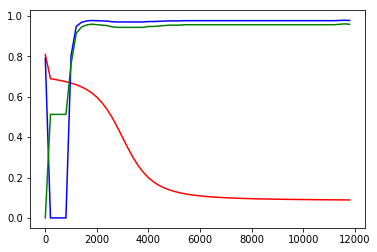

In [35]:
from matplotlib import pyplot as plt
epochs, losses, f0, f1 = zip(*log)
figure = plt.plot(epochs, losses, 'r-',epochs,f0,'b-',epochs,f1,'g-')
plt.show()